In [ ]:
import torch as t
import torchvision.datasets as datasets 
import torchvision.transforms as transforms
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)),])

trainset = datasets.MNIST(root='./data', download=True, train=True, transform=transform)
testset = datasets.MNIST(root='./data', download=True, train=False, transform=transform)
trainloader = t.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = t.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Part (a) DNN

Epoch 1 - Training loss: 0.33700922792002974
Epoch 2 - Training loss: 0.1348176872316025
Epoch 3 - Training loss: 0.09493987317899985
Epoch 4 - Training loss: 0.07413195705747228
Epoch 5 - Training loss: 0.06077536135347985
Epoch 6 - Training loss: 0.05007476064062286
Epoch 7 - Training loss: 0.04090122323599148
Epoch 8 - Training loss: 0.033601457890993634
Epoch 9 - Training loss: 0.029122957476362118
Epoch 10 - Training loss: 0.027036277834731993


Text(0.5, 1.0, 'error plot')

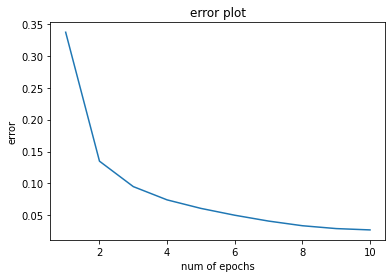

In [ ]:
# 2 hidden layers
input_size = 784
hidden_sizes = [512,512]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0],bias=True),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1],bias=True),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size,bias=True),
                      )
                 
criterion = nn.CrossEntropyLoss()
optimizer = t.optim.SGD(model.parameters(), lr=0.1, momentum=0.5)
loss_list = []
epochs = 10
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Epoch {e+1} - Training loss: {running_loss/len(trainloader)}")
    loss_list.append(running_loss/len(trainloader))
plt.plot(list(range(1,epochs+1)),loss_list)
plt.xlabel("num of epochs")
plt.ylabel("error")
plt.title("error plot")

In [ ]:
correct_count, all_count = 0, 0
for images,labels in testloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with t.no_grad():
      pred = model(img) # 10 prediction for 10 output neurons

    
    probab = list(pred.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print(f"\nModel Accuracy = {(correct_count/all_count)*100} %")

Number Of Images Tested = 10000

Model Accuracy = 98.02 %


Epoch 1 - Training loss: 0.40988286267688023
Epoch 2 - Training loss: 0.14534343441904607
Epoch 3 - Training loss: 0.10063921549478605
Epoch 4 - Training loss: 0.08418774523182528
Epoch 5 - Training loss: 0.0670730223005979
Epoch 6 - Training loss: 0.05363258750639362
Epoch 7 - Training loss: 0.046601487290876695
Epoch 8 - Training loss: 0.03830782788505193
Epoch 9 - Training loss: 0.035521403949673985
Epoch 10 - Training loss: 0.02895876159314374


Text(0.5, 1.0, 'error plot')

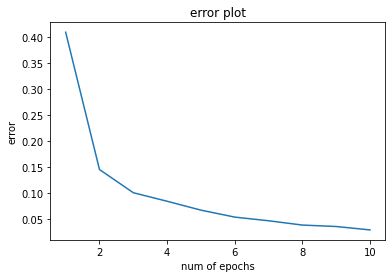

In [ ]:
# 3 hidden layers
input_size = 784
hidden_sizes = [512,512,512]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0],bias=True),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1],bias=True),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], hidden_sizes[2],bias=True),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[2], output_size,bias=True),
                      )
                 
criterion = nn.CrossEntropyLoss()
optimizer = t.optim.SGD(model.parameters(), lr=0.1, momentum=0.5)
loss_list = []
epochs = 10
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Epoch {e+1} - Training loss: {running_loss/len(trainloader)}")
    loss_list.append(running_loss/len(trainloader))
plt.plot(list(range(1,epochs+1)),loss_list)
plt.xlabel("num of epochs")
plt.ylabel("error")
plt.title("error plot")

In [ ]:
correct_count, all_count = 0, 0
for images,labels in testloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with t.no_grad():
      pred = model(img) # 10 prediction for 10 output neurons

    
    probab = list(pred.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print(f"\nModel Accuracy = {(correct_count/all_count)*100} %")

Number Of Images Tested = 10000

Model Accuracy = 97.88 %


Part (b) CNN

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Conv2d(1, 128, 3,bias=True)
        self.pool = nn.MaxPool2d(2, 2)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(128 * 13 * 13, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 10)


    def forward(self, x):
        x = self.pool(self.relu(self.conv(x)))
        x = t.flatten(x, 1) # flatten all dimensions except batch
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = Net()
print(model)

Net(
  (conv): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu): ReLU()
  (fc1): Linear(in_features=21632, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


Epoch 1 - Training loss: 0.24652310907056352
Epoch 2 - Training loss: 0.061357545320625734
Epoch 3 - Training loss: 0.03903819222234314
Epoch 4 - Training loss: 0.02658879350128545
Epoch 5 - Training loss: 0.01764623134091101
Epoch 6 - Training loss: 0.012993880120271853
Epoch 7 - Training loss: 0.00923719484834011
Epoch 8 - Training loss: 0.005133042308653127
Epoch 9 - Training loss: 0.0024051281229226906
Epoch 10 - Training loss: 0.0016268207090204064


Text(0.5, 1.0, 'error plot')

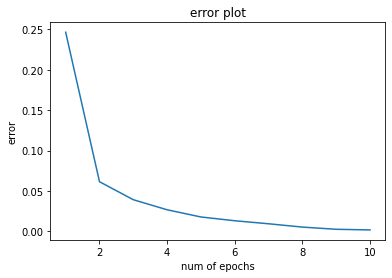

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = t.optim.SGD(model.parameters(), lr=0.1, momentum=0.5)
loss_list = []
epochs = 10
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Epoch {e+1} - Training loss: {running_loss/len(trainloader)}")
    loss_list.append(running_loss/len(trainloader))
plt.plot(list(range(1,epochs+1)),loss_list)
plt.xlabel("num of epochs")
plt.ylabel("error")
plt.title("error plot")

In [ ]:
correct_count,all_count = 0,0
for images,labels in testloader:
    with t.no_grad():
      pred = model(images) # 10 prediction for 10 output neurons
      _, predicted = t.max(pred.data, 1)
      all_count += labels.size(0)
      correct_count += (predicted == labels).sum().item()

print("Number Of Images Tested =", all_count)
print(f"\nModel Accuracy ={(correct_count/all_count)*100} %")

Number Of Images Tested = 10000

Model Accuracy =98.94 %


**Case 1**

1) For DNN\
Num_hidden_layer_neurons = [512,512]\
Test_accuracy = 97-98%

2) For CNN\
Num_kernels = 128\
kernel_size = 3\
Max_pool_size = 2\
Num_hidden_layer_neurons = [256,256]\
Test_accuracy = 99%\

**Observation** - in DNN number of parameters = 28 * 28 * 512 + 512 * 512 + 512 * 10 = 668672. In CNN number of parameters = 3 * 3 * 128 + 128 * 13 * 13 * 256 + 256 * 256 + 256 * 10 = 5607040.\
The accuracy in case of CNN for this case is higher.\
**Now we will test for different combinations of Num_hidden_layer_neurons and kernel_size**




**Case 2**\
For CNN\
Num_kernels = 128\
kernel_size = 5\
Max_pool_size = 2\
Num_hidden_layer_neurons = [128,128]

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Conv2d(1, 128, 5,bias=True)
        self.pool = nn.MaxPool2d(2, 2)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(128 * 12 * 12, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 10)


    def forward(self, x):
        x = self.pool(self.relu(self.conv(x)))
        x = t.flatten(x, 1) # flatten all dimensions except batch
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = Net()
print(model)

Net(
  (conv): Conv2d(1, 128, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu): ReLU()
  (fc1): Linear(in_features=18432, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


Epoch 1 - Training loss: 0.19369002723414053
Epoch 2 - Training loss: 0.05601572516664211
Epoch 3 - Training loss: 0.03691709553735998
Epoch 4 - Training loss: 0.02477556616062922
Epoch 5 - Training loss: 0.018832268695312137
Epoch 6 - Training loss: 0.013981899784358248
Epoch 7 - Training loss: 0.010148696502862892
Epoch 8 - Training loss: 0.006718680314669575
Epoch 9 - Training loss: 0.003825539636045699
Epoch 10 - Training loss: 0.0033048176724396875


Text(0.5, 1.0, 'error plot')

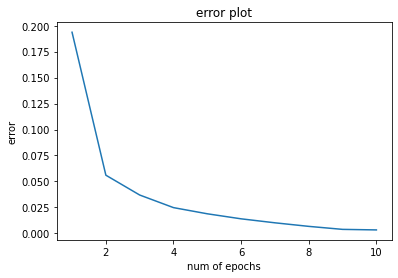

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = t.optim.SGD(model.parameters(), lr=0.1, momentum=0.5)
loss_list = []
epochs = 10
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Epoch {e+1} - Training loss: {running_loss/len(trainloader)}")
    loss_list.append(running_loss/len(trainloader))
plt.plot(list(range(1,epochs+1)),loss_list)
plt.xlabel("num of epochs")
plt.ylabel("error")
plt.title("error plot")

In [ ]:
correct_count,all_count = 0,0
for images,labels in testloader:
    with t.no_grad():
      pred = model(images) # 10 prediction for 10 output neurons
      _, predicted = t.max(pred.data, 1)
      all_count += labels.size(0)
      correct_count += (predicted == labels).sum().item()

print("Number Of Images Tested =", all_count)
print(f"\nModel Accuracy ={(correct_count/all_count)*100} %")

Number Of Images Tested = 10000

Model Accuracy =98.78 %


**Observation for Case 2**\
we observe that there is negligible change in test accuracy by reducing the number of neurons in dense layers. So we can reduce number of learnable parameters without affecting accuracy much.

**Case 3**\
For CNN\
chaning number of kernels to check accuracy\
Num_kernels = 24\
kernel_size = 5\
Max_pool_size = 2\
Num_hidden_layer_neurons = [128,128]

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Conv2d(1, 24, 5,bias=True)
        self.pool = nn.MaxPool2d(2, 2)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(24 * 12 * 12, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 10)


    def forward(self, x):
        x = self.pool(self.relu(self.conv(x)))
        x = t.flatten(x, 1) # flatten all dimensions except batch
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = Net()
print(model)

Net(
  (conv): Conv2d(1, 24, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu): ReLU()
  (fc1): Linear(in_features=3456, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


Epoch 1 - Training loss: 0.1805501035434494
Epoch 2 - Training loss: 0.05218891207245923
Epoch 3 - Training loss: 0.0344221239286745
Epoch 4 - Training loss: 0.022812313185513904
Epoch 5 - Training loss: 0.01683970420076461
Epoch 6 - Training loss: 0.011580982731498877
Epoch 7 - Training loss: 0.007854149426274196
Epoch 8 - Training loss: 0.006034880629013137
Epoch 9 - Training loss: 0.005850765659921077
Epoch 10 - Training loss: 0.004826210135763607


Text(0.5, 1.0, 'error plot')

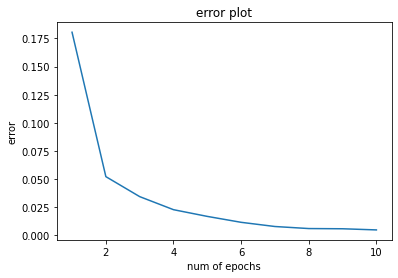

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = t.optim.SGD(model.parameters(), lr=0.1, momentum=0.5)
loss_list = []
epochs = 10
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Epoch {e+1} - Training loss: {running_loss/len(trainloader)}")
    loss_list.append(running_loss/len(trainloader))
plt.plot(list(range(1,epochs+1)),loss_list)
plt.xlabel("num of epochs")
plt.ylabel("error")
plt.title("error plot")

In [ ]:
correct_count,all_count = 0,0
for images,labels in testloader:
    with t.no_grad():
      pred = model(images) # 10 prediction for 10 output neurons
      _, predicted = t.max(pred.data, 1)
      all_count += labels.size(0)
      correct_count += (predicted == labels).sum().item()

print("Number Of Images Tested =", all_count)
print(f"\nModel Accuracy ={(correct_count/all_count)*100} %")

Number Of Images Tested = 10000

Model Accuracy =98.6 %


**Observation for Case 3**\
we observe that even after reducing the number of kernels, the accuracy is not changed much. The reason is that MNIST data set can be learned with less number of kernels because of its simplicity. It also speed up the learing process considerably as number of parameters are reduced quite a lot.